# Random Forest for Classification

Acest tutorial trece prin implementarea unui clasificator random forest și îl aplică la un set de date bine cunoscut. Random Forest sunt un tip de metodă de ansamblu, ceea ce înseamnă că folosesc o "medie" a mai multor modele de bază pentru a forma un singur model mai precis. Atunci când modelul de bază este un arbore de decizie, metoda de ansamblu este cunoscută sub numele de "pădure aleatorie", sau "Random Forest".

Deoarece Random Forests se bazează pe arbori de decizie, acest tutorial va trece mai întâi prin recapitularea arborilor de decizie pentru clasificare. Vor fi discutate limitările arborilor de decizie, iar apoi va fi implementat un clasificator de pădure aleatoare pentru a arăta cum le depășește. În cele din urmă, performanța implementării Random Forest din acest tutorial va fi comparată cu o implementare optimizată din biblioteca scikit-learn pe un set de date de exemplu.

## Recapitulare - Decision Trees
Continuam excursia noatra prin metodele de clasificare și regresie cu una dintre cele mai populare metode - arborele de decizie (Decision Trees). Decision Trees sunt utilizați în deciziile din viața de zi cu zi, nu doar în învățarea automată. Diagramele de flux sunt, de fapt, reprezentări vizuale ale arborilor de decizie. 

Să ilustrăm acest lucru cu ajutorul unui exemplu. Să presupunem că dorim să jucăm badminton într-o anumită zi - să zicem sâmbătă - cum vă veți decide dacă să jucați sau nu. Să presupunem că ieșiți afară și verificați dacă este cald sau frig, verificați viteza vântului și umiditatea, cum este vremea, adică dacă este soare, înnorat sau ploua. Ții cont de toți acești factori pentru a decide dacă vrei să joci sau nu.

Așadar, calculați toți acești factori pentru ultimele zece zile și formați un tabel ca cel de mai jos.

| Day |	Weather	| Temperature | Humidity	| Wind	 | Play?|
|-----|---------|-------------|-------------|--------|------|
|1	  | Sunny	| Hot	      | High	    | Weak   | No   |
|2	  | Cloudy	| Hot	      | High	    | Weak	 | Yes  |
|3	  | Sunny	| Mild	      | Normal	    | Strong | Yes  |
|4	  | Cloudy	| Mild	      | High	    | Strong | Yes  |
|5	  | Rainy	| Mild	      | High	    | Strong | No   |
|6	  | Rainy	| Cool	      | Normal  	| Strong | No   |
|7	  | Rainy	| Mild	      | High	    | Weak	 | Yes  |
|8	  | Sunny	| Hot	      | High	    | Strong | No   |
|9	  | Cloudy	| Hot	      | Normal	    | Weak	 | Yes  |
|10	  | Rainy	| Mild	      | High	    | Strong | No   |

Acum, puteți folosi acest tabel pentru a decide dacă doriți să jucați sau nu. Dar ce se întâmplă dacă modelul meteo de sâmbătă nu se potrivește cu niciunul dintre rândurile din tabel? Aceasta ar putea fi o problemă. Un arbore de decizie ar fi o modalitate excelentă de a reprezenta date de acest tip, deoarece ia în considerare toate căile posibile care pot duce la decizia finală, urmând o structură asemănătoare unui arbore.

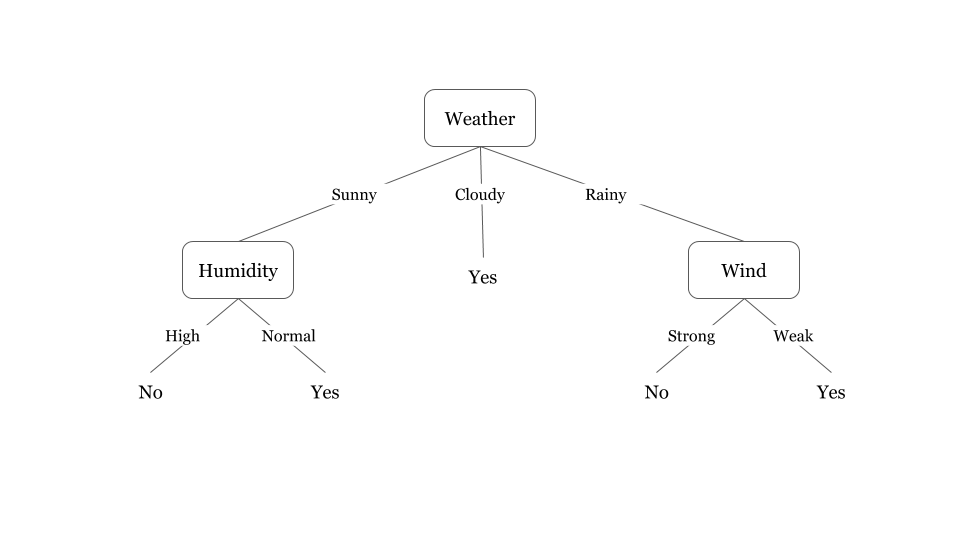

Fig. 1. Un arbore de decizie pentru conceptul Joacă Badminton

Fig. 1. ilustrează un arbore de decizie învățat. Putem observa că fiecare nod reprezintă un atribut sau o caracteristică, iar ramura din fiecare nod reprezintă rezultatul nodului respectiv. În cele din urmă, în frunzele arborelui se ia decizia finală. În cazul în care caracteristicile sunt continue, nodurile interne pot testa valoarea unei caracteristici în raport cu un prag (a se vedea figura 2).

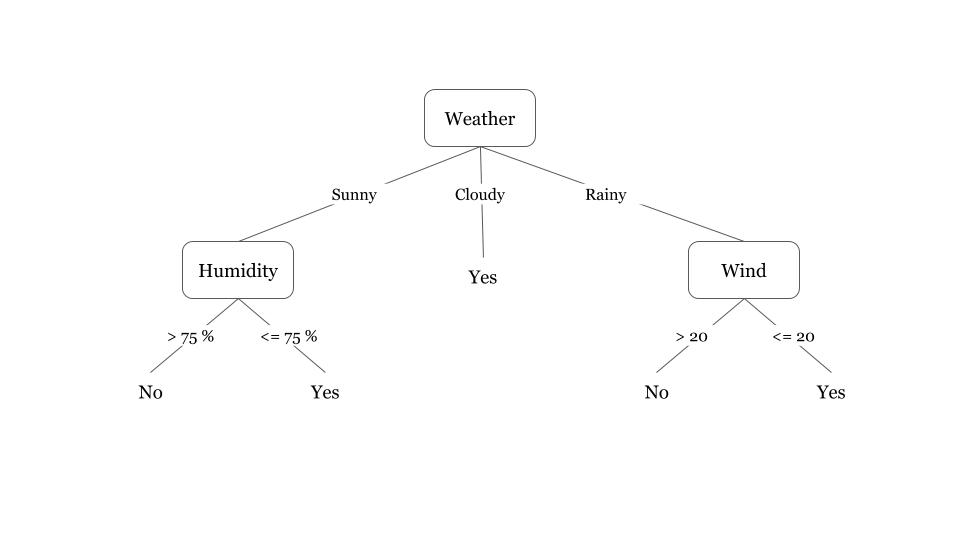

Fig. 2. Un arbore de decizie pentru conceptul "Joacă badminton" (când atributele sunt continue)
Un algoritm general pentru un arbore de decizie poate fi descris după cum urmează:

1. Alegeți cel mai bun atribut/caracteristică. Cel mai bun atribut este cel care împarte sau separă cel mai bine datele.
2. Se pune întrebarea relevantă.
3. Urmăriți calea de răspuns.
4.  Mergeți la pasul 1 până când ajungeți la răspuns.
Cea mai bună divizare este cea care separă două etichete diferite în două seturi.

## Cum se construiește un arbore de decizie
Mai devreme am văzut că decizia de a juca sau nu badminton data fiind vremea de afara. Dar ce variabilă trebuie analizată mai întâi? Să discutăm un exemplu simplu în care toate variabilele sunt binare.

Amintiți-vă jocul "20 de întrebări", la care se face adesea referire atunci când se introduc arborii de decizie. Probabil că ați jucat acest joc - o persoană se gândește la o celebritate, în timp ce cealaltă încearcă să ghicească, punând doar întrebări cu "Da" sau "Nu". Ce întrebare va pune primul cel care ghicește? Bineînțeles, o va întreba pe cea care reduce cel mai mult numărul de opțiuni rămase. Întrebarea "Este Angelina Jolie?" ar lăsa, în cazul unui răspuns negativ, toate celebritățile, cu excepția uneia, în domeniul posibilităților. În schimb, întrebarea "Este celebritatea o femeie?" ar reduce posibilitățile la aproximativ jumătate. Cu alte cuvinte, caracteristica "sex" separă setul de date privind celebritățile mult mai bine decât alte caracteristici precum "Angelina Jolie", "spaniolă" sau "iubește fotbalul". Acest raționament corespunde conceptului de câștig de informații bazat pe entropie.

## Entropie
Entropia lui Shannon este definită pentru un sistem cu N stări posibile după cum urmează:

\begin{equation} S = - \sum_{i=1}^{N} p_i log_{2} p_i\end{equation}

unde $p_i$ este probabilitatea de a găsi sistemul în starea a $i$-a. Acesta este un concept foarte important utilizat în fizică, în teoria informației și în alte domenii. Entropia poate fi descrisă ca fiind gradul de haos din sistem. Cu cât entropia este mai mare, cu atât sistemul este mai puțin ordonat și viceversa. Acest lucru ne va ajuta să formalizăm "divizarea efectivă a datelor", la care am făcut aluzie în contextul "20 de întrebări".

## Mini-exemplu
Pentru a ilustra modul în care entropia ne poate ajuta să identificăm caracteristici bune pentru construirea unui arbore de decizie, să analizăm un mini-exemplu. Vom prezice culoarea mingii pe baza poziției sale.

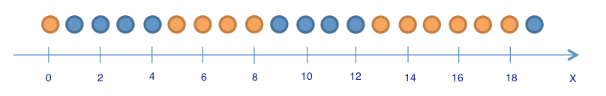

Există 9 bile albastre și 11 bile galbene. Dacă scoatem la întâmplare o bilă, atunci aceasta va fi albastră cu probabilitatea $p_i = \frac{9}{20}$ și galben cu probabilitatea $p_i = \frac{11}{20}$, ceea ce ne dă o entropie de $S = - \frac{9}{20} log_{2} \frac{9}{20} - \frac{11}{20} log_{2}\frac{11}{20} \approx 1$. Această valoare în sine nu ne poate spune prea multe, dar să vedem cum se schimbă valoarea dacă împărțim bilele în două grupuri: cu poziția mai mică sau egală cu 12 și mai mare de 12.

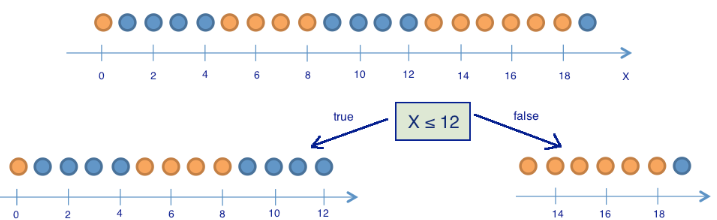

Grupul din stânga are 13 bile, 8 albastre și 5 galbene. Entropia acestui grup este $S = - \frac{5}{13} log_{2} \frac{5}{13} - \frac{8}{13} log_{2}\frac{8}{13} \approx 0.96$. Grupul din dreapta are 7 bile, 1 albastră și 6 galbene. Entropia grupului din dreapta este $S = - \frac{1}{7} log_{2} \frac{1}{7} - \frac{6}{7} log_{2}\frac{6}{7} \approx 0.6$. După cum se poate observa, entropia a scăzut în ambele grupuri, dar mai mult în grupul din dreapta. Deoarece entropia este, de fapt, gradul de haos (sau incertitudine) din sistem, reducerea entropiei se numește câștig de informație. În mod formal, câștigul de informație (IG) pentru o împărțire bazată pe variabila $Q$ (in acest exemplu este variabila $x \leq 12$) se defineste ca:

\begin{equation} IG(Q) = S_{O} - \sum_{i=1}^{q} \frac{N_{i}}{N} S_{i}\end{equation}

unde $q$ este numărul de grupuri după divizare, $N_i$ este numărul de obiecte din sample în care variabila $Q$ este egală cu a $i$-a valoare.  În exemplul nostru, împărțirea noastră a dat două grupuri ($q=2$), unul cu 13 elemente ($N_1=13$), si altul cu 7 ($N_2=7$). Prin urmare, putem calcula câștigul informațional ca fiind:

\begin{equation} IG(x \leq 12) = S_{0} - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16 \end{equation}

S-a dovedit că împărțirea bilelor în două grupe prin împărțirea pe "coordonata este mai mică sau egală cu 12" ne-a oferit un sistem mai ordonat. Să continuăm să le împărțim în grupuri până când bilele din fiecare grup sunt toate de aceeași culoare.

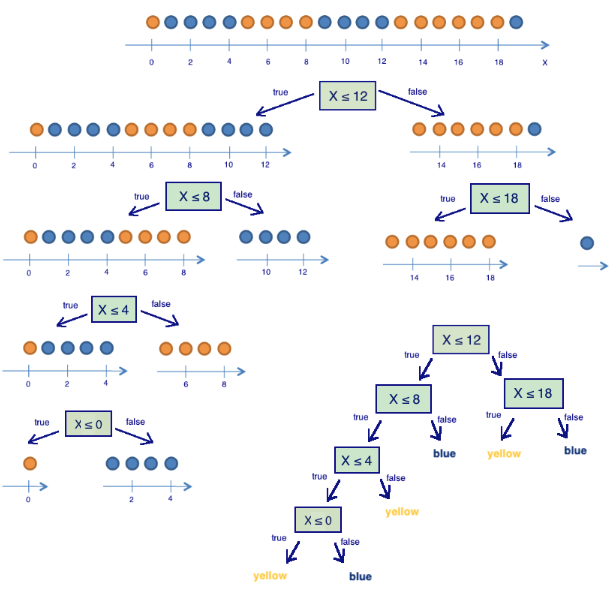


Pentru grupul din dreapta, putem vedea cu ușurință că avem nevoie doar de o partiție suplimentară folosind "coordonate mai mici sau egale cu 18". Dar, pentru grupul din stânga, avem nevoie de încă trei partiții. Rețineți că entropia unui grup în care toate bilele sunt de aceeași culoare este egală cu 0 ($log_{2}1=0$).

Am construit cu succes un arbore de decizie care prezice culoarea mingii pe baza poziției acesteia. Este posibil ca acest arbore de decizie să nu funcționeze bine dacă adăugăm alte bile, deoarece s-a adaptat perfect la setul de antrenament (20 de bile inițiale). Dacă am dori să ne descurcăm bine în acest caz, un arbore cu mai puține "întrebări" sau diviziuni ar fi mai precis, chiar dacă nu se potrivește perfect setului de antrenament. Vom discuta mai târziu problema supraadaptării (overfitting).

## Arbore de decizie - Algoritm
Ne putem asigura că arborele construit în exemplul anterior este optim: a fost nevoie de doar 5 "întrebări" (condiționate de variabila $x$) pentru a potrivi perfect un arbore de decizie la setul de instruire. În alte condiții de divizare, arborele rezultat ar fi mai profund, adică ar necesita mai multe "întrebări" pentru a ajunge la un răspuns.

În centrul algoritmilor populari de construire a arborelui de decizie, se află principiul maximizării "lacome/egoiste (greedy)" a câștigului de informații: la fiecare pas, algoritmul alege variabila care oferă cel mai mare câștig de informații la împărțire. Apoi, procedura se repetă în mod recursiv până când entropia este zero (sau o valoare mică pentru a ține cont de supraadaptare (overfitting)). Diferiți algoritmi utilizează diferite euristici pentru "oprirea timpurie" sau "întreruperea" pentru a evita construirea unui arbore supraadaptat (overfitted).

```
def build(L):
    create node t
    if the stopping criterion is True:
        assign a predictive model to t
    else:
        Find the best binary split L = L_left + L_right
        t.left = build(L_left)
        t.right = build(L_right)
    return t  
```

## Exemplu
Să luăm în considerare invatarea unui arbore de decizie cu niște date sintetice. Vom genera eșantioane din două clase, ambele cu distribuții normale, dar cu medii diferite.

In [ ]:
import warnings

warnings.filterwarnings("ignore")
import numpy as np
np.random.seed(17)

# first class
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

Să reprezentăm grafic datele. În mod informal, problema de clasificare în acest caz este de a construi o limită "bună" care să separe cele două clase (punctele roșii de cele galbene). Învățarea automată pentru acest caz se reduce la alegerea unei granițe bune de separare. O linie dreaptă va fi prea simplă, în timp ce o curbă complexă care șerpuiește pe lângă fiecare punct roșu va fi prea complexă și ne va conduce la greșeli în cazul noilor eșantioane. În mod intuitiv, o anumită graniță netedă, sau cel puțin o linie dreaptă sau un hiperplan, ar funcționa bine pe noile date.

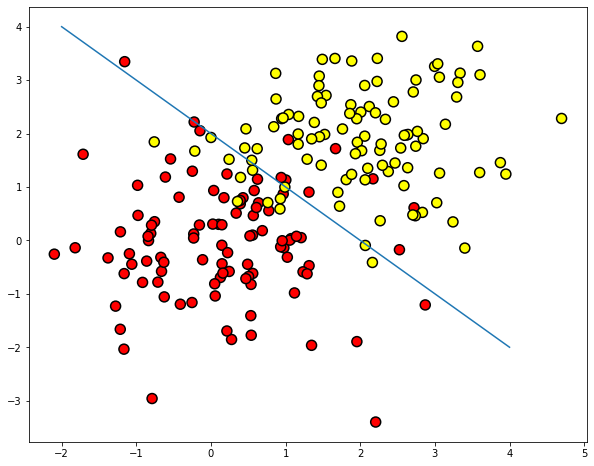

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
)
plt.plot(range(-2, 5), range(4, -3, -1));

Să încercăm să separăm aceste două clase prin antrenarea unui arbore de decizie <span style='background:yellow'>Sklearn</span>. Vom utiliza parametrul max_depth care limitează adâncimea arborelui. Să vizualizăm limita de separare rezultată.

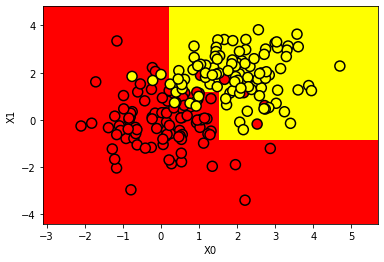

In [ ]:
from sklearn.tree import DecisionTreeClassifier


# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.xlabel('X0')
plt.ylabel('X1')
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
);

Și cum arată arborele de decizie în sine? Vedem că arborele "taie" spațiul în 8 dreptunghiuri, adică are 8 frunze. În cadrul fiecărui dreptunghi, arborele va face predicția în funcție de eticheta majoritară a obiectelor din interiorul acestuia.

In [ ]:
# !pip install graphviz

[Text(0.5, 0.875, 'X[1] <= 1.211\nentropy = 1.0\nsamples = 200\nvalue = [100, 100]'),
 Text(0.25, 0.625, 'X[0] <= 1.524\nentropy = 0.68\nsamples = 111\nvalue = [91, 20]'),
 Text(0.125, 0.375, 'X[1] <= 0.572\nentropy = 0.351\nsamples = 91\nvalue = [85, 6]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 69\nvalue = [69, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.845\nsamples = 22\nvalue = [16, 6]'),
 Text(0.375, 0.375, 'X[1] <= -0.811\nentropy = 0.881\nsamples = 20\nvalue = [6, 14]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.672\nsamples = 17\nvalue = [3, 14]'),
 Text(0.75, 0.625, 'X[0] <= 0.229\nentropy = 0.473\nsamples = 89\nvalue = [9, 80]'),
 Text(0.625, 0.375, 'X[1] <= 1.642\nentropy = 0.881\nsamples = 10\nvalue = [7, 3]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6875, 0.125, 'entropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(0.875, 0.375, 'X[1] <= 1.893\nentropy = 0.17\nsamples = 79\nv

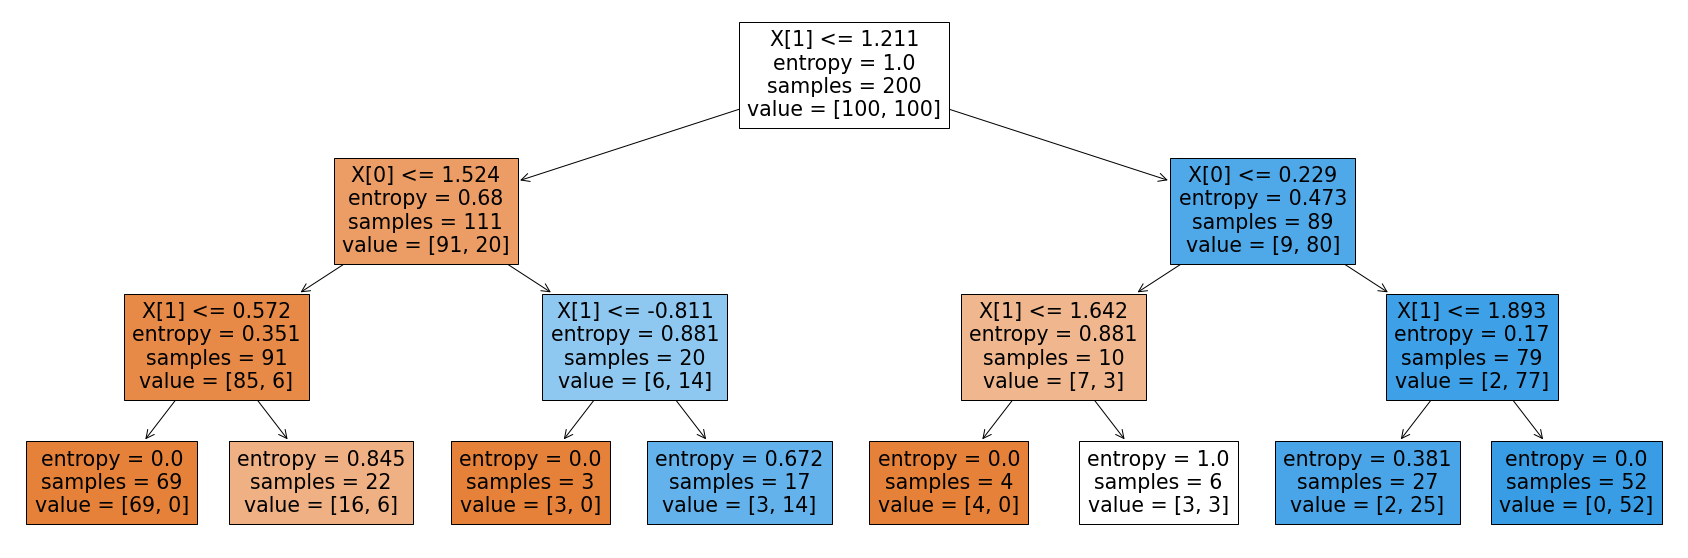

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))

tree.plot_tree(clf_tree, filled=True)

## Import tools

In [ ]:
import numpy as np
import pandas as pd

## Get the data

## Node class

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

## Tree class

In [ ]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2, seed=42, random_state=None):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.random_state = random_state if random_state != None else np.random.RandomState(seed)
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)

    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        best_split["info_gain"] = max_info_gain
        
        # ############### non-stochastic feature selection ###############
        # n_cols = dataset.shape[1]
        # feature_indices = np.arange(dataset.shape[1]-1)
        # ############### non-stochastic feature selection ###############
        
        ############### stochastic feature selection ###############
        n_cols = int(np.sqrt(dataset.shape[1]-1))
        feature_indices = self.random_state.choice(np.arange(dataset.shape[1]-1), n_cols, replace=False)
        ############### stochastic feature selection ###############
        
        # loop over all the features
        for feature_index in feature_indices:
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    
    def get_best_split_old(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        best_split["info_gain"] = max_info_gain
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return np.array(preditions).reshape(-1, 1)
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

### Sa aplicam implementarea asupra setului de date Iris

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
!mkdir data && curl -o data/iris.data -LJO https://github.com/dianaartiom/machine_learning_with_python/raw/main/lesson08/notebooks/data/iris.data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type']
data = pd.read_csv("data/iris.data", skiprows=1, header=None, names=col_names)
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,type
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


## Train-Test split

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=41)

In [ ]:
y_train.shape

(119, 1)

## Fit the model

In [ ]:
classifier = DecisionTreeClassifier(min_samples_split=2, max_depth=6)
classifier.fit(X_train, y_train)
classifier.print_tree()

X_3 <= 0.6 ? 0.33904421497105636
 left:Iris-setosa
 right:X_3 <= 1.5 ? 0.40269559500328744
  left:X_0 <= 6.0 ? 0.002348079271156142
    left:Iris-versicolor
    right:X_0 <= 6.1 ? 0.06122448979591841
        left:X_3 <= 1.2 ? 0.5
                left:Iris-versicolor
                right:Iris-virginica
        right:Iris-versicolor
  right:X_3 <= 1.7 ? 0.040912933220625364
    left:X_0 <= 4.9 ? 0.16666666666666669
        left:Iris-virginica
        right:X_2 <= 5.0 ? 0.4444444444444444
                left:Iris-versicolor
                right:Iris-virginica
    right:X_0 <= 5.9 ? 0.00789115646258505
        left:X_0 <= 5.8 ? 0.11111111111111102
                left:Iris-virginica
                right:X_1 <= 3.0 ? 0.5
                                left:Iris-virginica
                                right:Iris-versicolor
        right:Iris-virginica


In [ ]:
y_train_pred = classifier.predict(X_train) 
accuracy_score(y_train, y_train_pred)

1.0

## Test the model

In [ ]:
y_test_pred = classifier.predict(X_test) 
accuracy_score(y_test, y_test_pred)

0.8

In [ ]:
def visualize_xor_classifier(model, X, y):
    """ Visualize decisision boundaries, hard-coded for the XOR example problem.
        Args:
            model (decision tree like) : classification model object
            X (np array) : array of training data, n_samples x n_features
            y (array like) : vector of class labels, n_samples            
    """
    xx, yy = np.meshgrid(np.linspace(-1,2,200), np.linspace(-1,2,200))
    samples = (np.c_[xx.ravel(), yy.ravel()]).tolist()
    Z = (np.array(model.predict(samples))).reshape(xx.shape)

    f, ax = plt.subplots(figsize=(5,4), dpi=125)
    ax.scatter(X[:,0], X[:,1], c=y, zorder=3, cmap='bwr', s=10)
    ax.contourf(xx, yy, Z, alpha=0.6, levels=[-.5,.5,1.5], zorder=1, cmap='bwr');
    ax.axis([-1, 2, -1, 2]); ax.set_xlabel('X1'); ax.set_ylabel('X2')
    

In [ ]:
class RandomForest:
    """ Build random forest classification model and predict class labels on unseen examples.
        Attributes:
            max_depth (int) : maximum depth tree is allowed to grow to
            n_trees (int) : number of decision trees in ensemble
            loss_fxn (funtion) : function for evaluating data split loss
            split_fxn (function) : function for determing best feature and value to split on
            trees (list) : list of learned decision tree models             
    """

    
    def __init__(self, n_trees=5, min_samples_split=2, max_depth=float('Inf'), seed=42, random_state=None):
        """ Initialize a decision tree classifier model.
            Args:
                n_trees (int) : (optional) number of decision trees in ensemble
                max_depth (int) : (optional) maximum depth tree is allowed to grow to
                loss (function) : (optional) function for evaluating data split loss
                split (function) : (optional) function for determining best feature and value to split on
        """
        self.max_depth = max_depth
        self.n_trees = n_trees
        self.loss_fxn = self.gini_index
        self.trees = []       
        self.min_samples_split = min_samples_split
        self.random_state = random_state if random_state != None else np.random.RandomState(seed)
    
    def fit(self, X, y):
        """ Fit a random forest classification model to training data.
            Args:
                X (np array) : array of training data, n_samples x n_features
                y (array like) : vector of class labels, n_samples
        """
        for i in range(self.n_trees):
            sample_idx = self.random_state.choice(X.shape[0], X.shape[0], replace=True)
            tree = DecisionTreeClassifier(min_samples_split=self.min_samples_split, max_depth=self.max_depth)
            tree.fit(X[sample_idx], y[sample_idx])
            self.trees.append(tree)           
    
    def majority_vote(self, y):
        vote_result = []
        for sample_id in range(y.shape[0]):
            predictions = y[sample_id, :]
            unique, counts = np.unique(predictions, return_counts=True)
            most_common_index = np.argmax(counts)

            vote_result.append(unique[most_common_index])
            
        return np.array(vote_result)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        # y = []
        for tree in self.trees:
            predictions = tree.predict(X)
            # y.append(predictions)
        
        y = self.majority_vote(np.array(predictions))
            
        return y
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini

In [ ]:
from sklearn.datasets import make_blobs 
X, y = make_blobs(n_samples=1000, cluster_std=[.35]*4, random_state=0,
                  centers=[[0, 0],[0, 1],[1, 0],[1, 1]])
y[y==3] = 0
y[y==2] = 1


In [ ]:
forest = RandomForest(n_trees=3, max_depth=6)
forest.fit(X, y.reshape(-1, 1))

In [ ]:
y_pred = forest.predict(X) 
accuracy_score(y.reshape(-1, 1), y_pred)

0.872

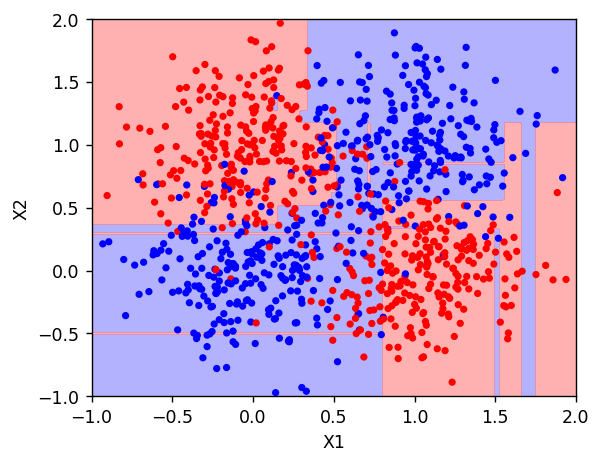

In [ ]:
visualize_xor_classifier(forest, X, y.reshape(-1, 1))

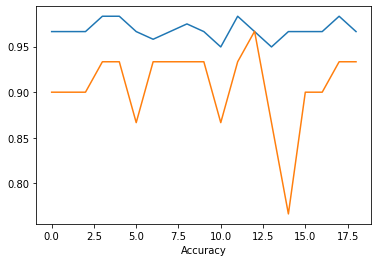

In [ ]:
train_accuracies = []
test_accuracies = []

for n_trees in range(1, 20):
    forest = RandomForest(n_trees=n_trees, max_depth=3, min_samples_split=10)
    forest.fit(X_train, y_train)
    
    y_train_pred = forest.predict(X_train) 
    acc_train = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(acc_train)
    
    
    y_test_pred = forest.predict(X_test) 
    acc_test = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(acc_test)

plt.plot(train_accuracies, label='Training')
plt.plot(test_accuracies, label='Test')
plt.xlabel("Number of trees")
plt.xlabel("Accuracy")
plt.show()

In [ ]:
best_hyper_param = {"max_depth": 1, "n_trees": 1, "min_samples_split": 2}
max_accuracy = -float('Inf')
for max_depth in range(1, 6):
    for n_trees in range(1, 11):
        for min_samples_split in range(2, 12):
            forest = RandomForest(n_trees=n_trees, max_depth=max_depth, min_samples_split=min_samples_split)
            forest.fit(X_train, y_train)
            y_train_pred = forest.predict(X_train) 
            y_test_pred = forest.predict(X_test) 
            acc_test = accuracy_score(y_test, y_test_pred)
            if acc_test > max_accuracy:
                max_accuracy = acc_test
                best_hyper_param["max_depth"] = max_depth
                best_hyper_param["n_trees"] = n_trees
                best_hyper_param["min_samples_split"] = min_samples_split
                best_hyper_param["acc_test"] = acc_test
                best_hyper_param["acc_train"] = acc_train

In [ ]:
print("Best hyperparames: ", best_hyper_param)

Best hyperparames:  {'max_depth': 4, 'n_trees': 4, 'min_samples_split': 2, 'acc_test': 0.9666666666666667, 'acc_train': 0.9663865546218487}


In [ ]:
n_trees = best_hyper_param['n_trees']
max_depth = best_hyper_param['max_depth']
min_samples_split = best_hyper_param['min_samples_split']

forest = RandomForest(n_trees=n_trees, max_depth=max_depth, min_samples_split=min_samples_split)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train) 
print("Train accuracy: ", accuracy_score(y_train, y_train_pred))
y_test_pred = forest.predict(X_test) 
print("Test accuracy: ", accuracy_score(y_test, y_test_pred))

Train accuracy:  0.9831932773109243
Test accuracy:  0.9666666666666667


## Implementarea cu ajutorul sklearn

In [ ]:
from sklearn.ensemble import RandomForestClassifier

sk_forest = RandomForestClassifier()
sk_forest.fit(X_train, y_train)

y_train_pred = sk_forest.predict(X_train) 
print("Train accuracy: ", accuracy_score(y_train, y_train_pred))
y_test_pred = sk_forest.predict(X_test) 
print("Test accuracy: ", accuracy_score(y_test, y_test_pred))

Train accuracy:  1.0
Test accuracy:  0.9


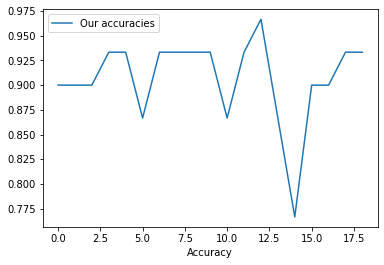

In [ ]:
warnings.filterwarnings("ignore")
our_accuracies = []
sk_accuracies = []

for n_trees in range(1, 20):
    
    forest = RandomForest(n_trees=n_trees, max_depth=3, min_samples_split=10)
    forest.fit(X_train, y_train)
    y_our_pred = forest.predict(X_test) 
    acc_our_test = accuracy_score(y_test, y_our_pred)
    our_accuracies.append(acc_our_test)
    
    # sk_forest = RandomForestClassifier(n_estimators=n_trees)
    # sk_forest.fit(X_train, y_train)
    # y_sk_pred = forest.predict(X_test) 
    # acc_sk = accuracy_score(y_test, y_sk_pred)
    # sk_accuracies.append(acc_sk)

plt.plot(our_accuracies, label='Our accuracies')
# plt.plot(sk_accuracies, label='Sk accuracies')
plt.xlabel("Number of trees")
plt.xlabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
warnings.filterwarnings("ignore")
our_accuracies = []
sk_accuracies = []

for n_trees in range(1, 20):
    
    # forest = RandomForest(n_trees=n_trees, max_depth=3, min_samples_split=10)
    # forest.fit(X_train, y_train)
    # y_our_pred = forest.predict(X_test) 
    # acc_our_test = accuracy_score(y_test, y_our_pred)
    # our_accuracies.append(acc_our_test)
    
    sk_forest = RandomForestClassifier(n_estimators=n_trees)
    sk_forest.fit(X_train, y_train)
    y_sk_pred = forest.predict(X_test) 
    acc_sk = accuracy_score(y_test, y_sk_pred)
    print(f"Acuratetea sk.tree pentru {n_trees} trees este {acc_sk}.")
    sk_accuracies.append(acc_sk)



Acuratetea sk.tree pentru 1 trees este 0.9333333333333333.
Acuratetea sk.tree pentru 2 trees este 0.9333333333333333.
Acuratetea sk.tree pentru 3 trees este 0.9333333333333333.
Acuratetea sk.tree pentru 4 trees este 0.9333333333333333.
Acuratetea sk.tree pentru 5 trees este 0.9333333333333333.
Acuratetea sk.tree pentru 6 trees este 0.9333333333333333.
Acuratetea sk.tree pentru 7 trees este 0.9333333333333333.
Acuratetea sk.tree pentru 8 trees este 0.9333333333333333.
Acuratetea sk.tree pentru 9 trees este 0.9333333333333333.
Acuratetea sk.tree pentru 10 trees este 0.9333333333333333.
Acuratetea sk.tree pentru 11 trees este 0.9333333333333333.
Acuratetea sk.tree pentru 12 trees este 0.9333333333333333.
Acuratetea sk.tree pentru 13 trees este 0.9333333333333333.
Acuratetea sk.tree pentru 14 trees este 0.9333333333333333.
Acuratetea sk.tree pentru 15 trees este 0.9333333333333333.
Acuratetea sk.tree pentru 16 trees este 0.9333333333333333.
Acuratetea sk.tree pentru 17 trees este 0.9333333

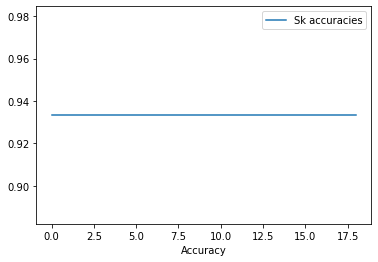

In [ ]:
# plt.plot(our_accuracies, label='Our accuracies')
plt.plot(sk_accuracies, label='Sk accuracies')
plt.xlabel("Number of trees")
plt.xlabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
import time
import numpy as np

sk_forest = RandomForestClassifier()
sk_forest.fit(X_train, y_train)


start_time = time.time()
importances = sk_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in sk_forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.010 seconds


In [ ]:
data.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type'], dtype='object')

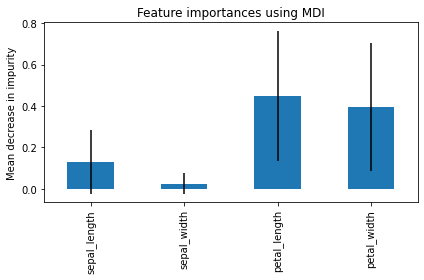

In [ ]:
import pandas as pd

forest_importances = pd.Series(importances, index=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()